<a href="https://colab.research.google.com/github/10100111/Display-of-HW1/blob/main/56_Lite_%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81_%D0%BF%D0%BE%D0%B4%D0%BA%D1%80%D0%B5%D0%BF%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%D0%BC_%D0%98%D0%B7%D0%BC%D0%B5%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B3%D0%B8%D0%BF%D0%B5%D1%80%D0%BF%D0%B0%D1%80%D0%B0%D0%BC%D0%B5%D1%82%D1%80%D0%BE%D0%B2_%D0%9D%D0%A1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание Lite

Макс 10 баллов

1. Запустите нейросеть на разном количестве тренировок, сравните результаты:

10 тренировок - количество выигранных очков?

20 тренировок - количество выигранных очков?

30 тренировок - количество выигранных очков?

2. Проведите небольшую тренировочную сессию, изменив архитектуру нейросети:

изменив количество связей в Dense слое,

добавив Dense слой,

добавив Conv слой.

Результаты сравните.

## Import библиотек


In [ ]:
#В связи с недавним обновлением библиотеки gym, попытки создать игровую среду pong-v0 (или любую другую) теперь вызывают ошибку. 
#Следующий код является временной мерой для избежания этой ошибки.
#Здесь меняется версия библиотек. Этот код был добавлен 28 мая. Когда обновят gym и уберут критичный баг, этот код будет удален.

!pip install gym==0.18.3
!pip install atari-py==0.2.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.1 MB/s 
     |████████████████████████████████| 1.1 MB 50.8 MB/s 
  Created wheel for gym: filename=gym-0.18.3-py3-none-any.whl size=1657529 sha256=62e0a42976cacb1ed5ff2eb61d79908b7891f66fe75845df9d1ecc433b24b645
  Stored in directory: /root/.cache/pip/wheels/1a/ec/6d/705d53925f481ab70fd48ec7728558745eeae14dfda3b49c99
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.8 MB 3.3 MB/s 
  Attempting uninstall: atari-py
    Found existing installation: atari-py 0.2.9
    Uninstalling atari-py-0.2.9:
      Successfully uninstalled atari-py-0.2.9


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import gym         # загружаем "тренажер" Gym из платформы OpenAi, предоставляющий среду для работы над обучением с подкреплением 
import numpy as np # импортируем библиотеку для работы с массивами данных
import tensorflow.keras as keras        # импортируем нейросетевую библиотеку 
from tensorflow.keras.models import Model, load_model # из кераса подгружаем абстрактный класс базовой модели, метод загрузки предобученной модели
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda, Conv1D, Conv2D, MaxPooling2D, Reshape, Multiply # из кераса загружаем необходимые слои для нейросети
from tensorflow.keras.utils import plot_model #Функция визуализации архитектуры модели
from tensorflow.keras.optimizers import RMSprop, Adam, SGD # из кераса загружаем выбранный оптимизатор
import time                                # модуль для операций со временными характеристиками
import matplotlib.pyplot as plt            # импортируем библиотеку для визуализации данных
import tensorflow as tf               #импортируем tensorflow
 
# "магическая" команда python для запуска библиотеки в ноутбуке
%matplotlib inline

In [ ]:
#Отключаем функционал из tf2.0, что бы код был совместим с современным тензорфлоуом
tf.compat.v1.disable_eager_execution()

## Взгляд на игру




In [ ]:
env = gym.make('Pong-v0') # создаем среду игры Понг средствами OpenAI Gym('env' = environment)
observation = env.reset() # задаем начальное состояние среды, которое наблюдает агент
observation.shape         # взглянем на форму состояния среды
                          # увидим, что это изображение размером 210*160 с тремя RGB каналами

(210, 160, 3)

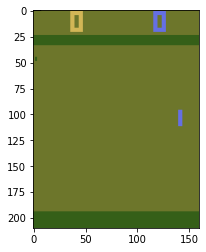

In [ ]:
plt.imshow(observation) # вызовем визуализацию состояния среды с помощью метода imshow от matplotlib.pyplot
plt.show() 

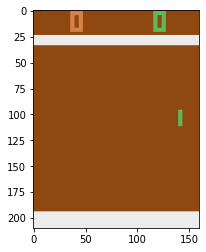

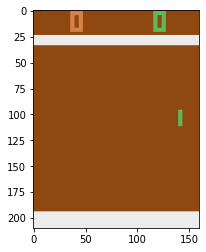

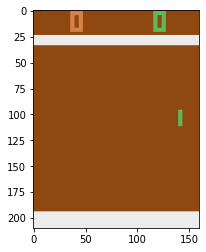

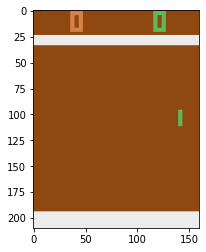

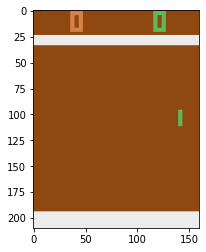

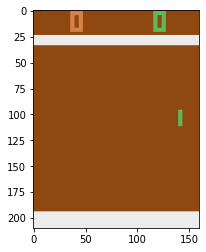

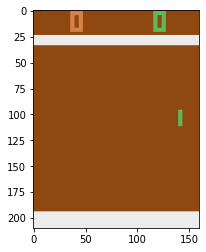

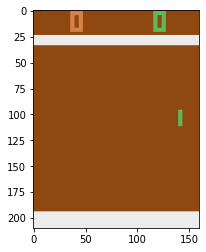

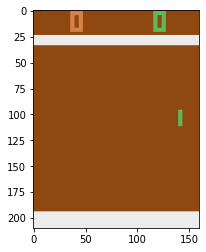

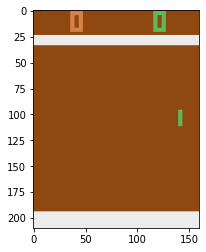

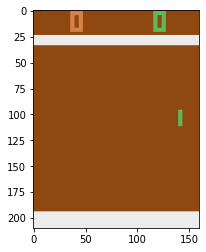

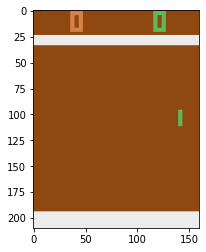

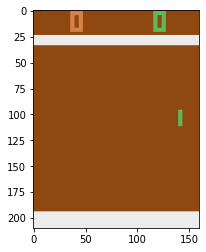

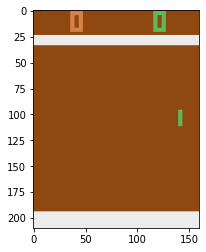

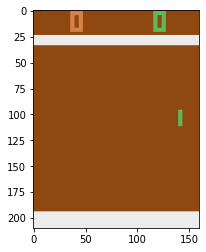

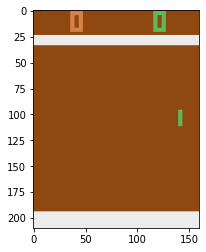

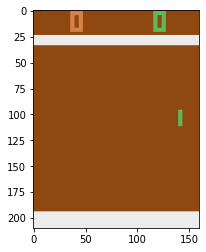

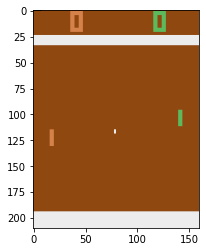

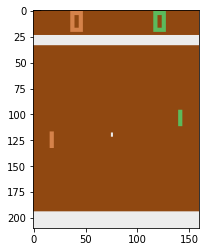

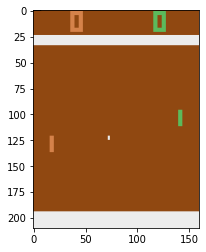

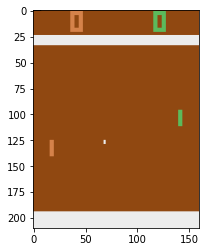

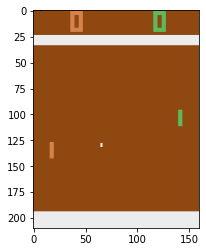

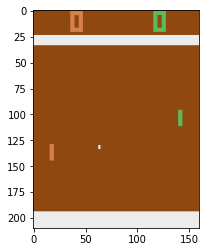

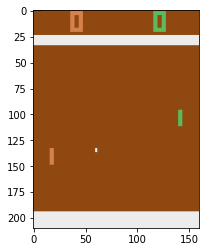

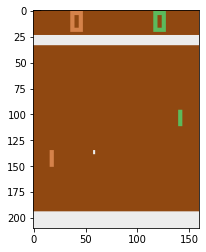

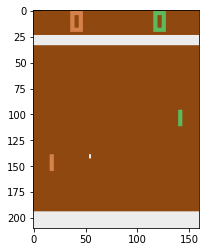

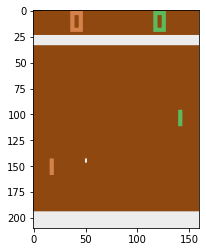

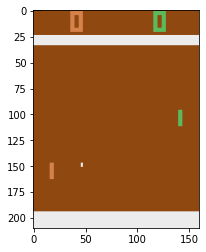

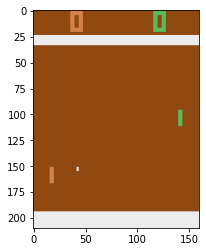

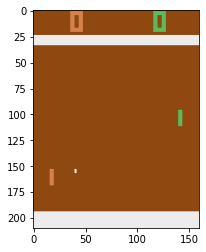

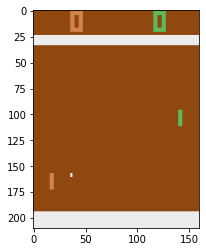

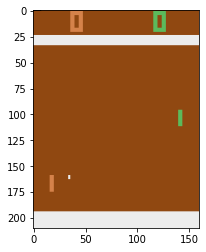

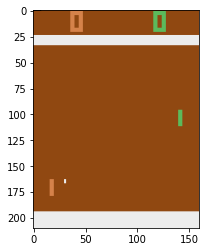

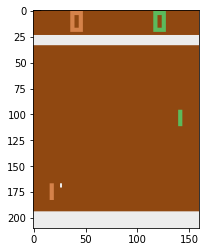

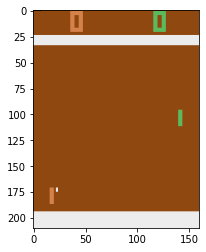

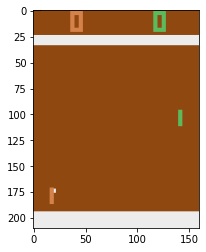

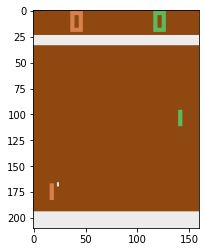

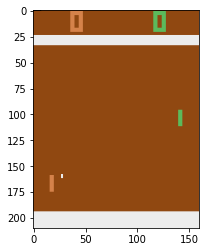

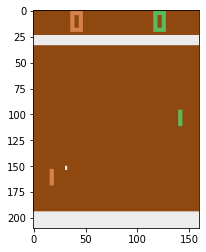

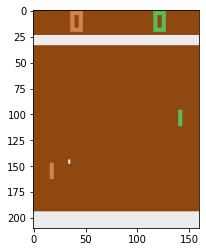

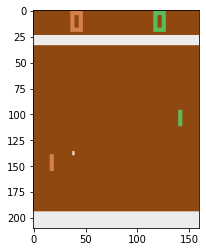

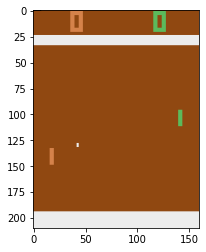

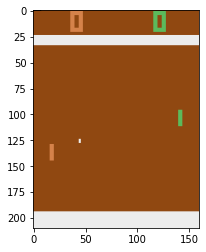

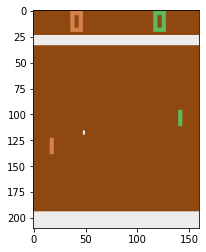

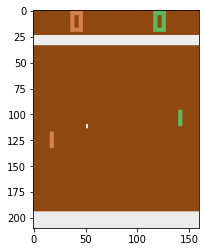

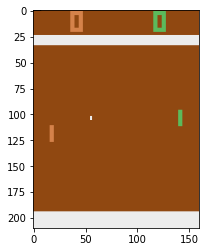

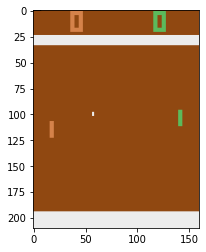

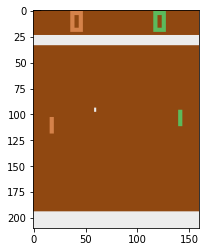

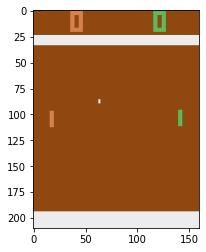

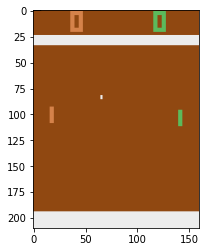

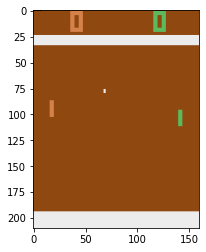

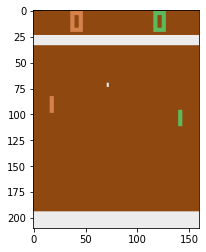

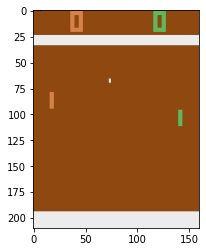

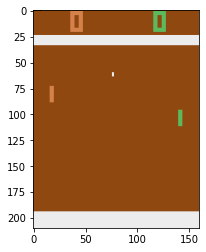

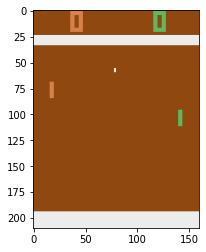

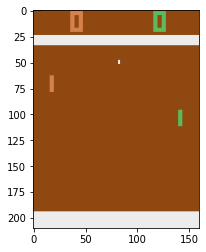

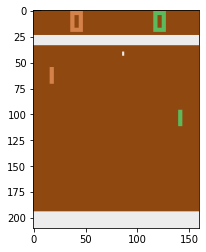

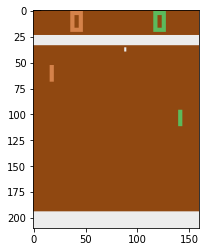

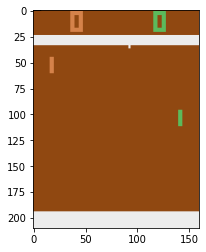

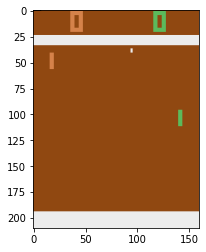

In [ ]:
# В понге:
# 0 цифровое обозначение если ракетка 'остаётся на месте'
# 2 цифровое обозначение для действия ракеткой 'сдвинуться вверх'
# 3 цифровое обозначение для действия ракеткой 'сдвинуться вниз'
 
# Проиграем вперёд игру на 30 кадров чтобы увидеть полную сцену игры
for i in range(60):
    # env.render()
    observation, reward, done, info = env.step(0) # 0 обозначает,что ничего не делаем, остаемся на месте
    plt.imshow(observation)                      # взглянем на текущее состояние среды: наш агент владеет зелёной ракеткой, появился соперник и мяч
    plt.show()
# step - такт, шаг в игре: принимает (action, действие агента), возвращает кортеж (observation, reward, done, info)
# observation (object) - текущее состояние среды, которое наблюдает агент(пиксели)
# reward (float) - награда за совершённое действие
# done (True or False) - обозначает завершился ли игровой эпизод (в понге до победы 21 очко)
# info (dict) - вспомогательная диагностическая информация, типа кол-во оставшихся жизней(неактуально для понга)

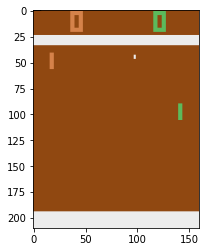

In [ ]:
# Policy(политику, стратегию агента) будет позже задавать нейросеть.
# мы подадим ей разницу между новым и предыдущим кадром, чтобы отслеживалось смещение мяча/ракеток и данные были понятными
newObservation, reward, done, info = env.step(2) # задаем очередным шагом следующий кадр, при этом смещая ракетку вверх
plt.imshow(newObservation)                       # взглянем на следующий кадр(нам смещение едва видно, либо не видно, т.к визуально длина шага мала)

## Предобработка данных


In [ ]:
# Зададим функцию предобработки данных для подачи в нейросеть
# избавимся вот всего лишнего(фон, размер и т.п), оставив на экране лишь мяч и ракетки
def preprocessFrames(newFrame, lastFrame): # подаем в функцию новый и предыдущий кадр
  nFrame = newFrame.astype(np.int32)      # переводим в целочисленный тип новый кадр
  nFrame[nFrame==144] = 0                 # удаляем цвета заднего фона в новом кадре(144 и 72 - значения каналов, дающих оранжевый цвет, зануляем)
  nFrame[nFrame==72] = 0                  # удаляем цвета заднего фона в новом кадре(144 и 72 - значения каналов, дающих оранжевый цвет, зануляем)  
  lFrame = lastFrame.astype(np.int32)     # переводим в целочисленный тип предыдущий кадр
  lFrame[lFrame==144] = 0                 # удаляем цвета заднего фона в новом кадре(144 и 72 - значения каналов, дающих оранжевый цвет, зануляем)
  lFrame[lFrame==72] = 0                  # удаляем цвета заднего фона в новом кадре(144 и 72 - значения каналов, дающих оранжевый цвет, зануляем)  
  deltaFrame = nFrame - lFrame            # задаём разницу между новым и предыдущим кадром   
  # Отрезаем верхнюю и нижнюю(неинформативные) части экрана, по 35 сверху и снизу
  deltaFrame = deltaFrame[35:195]         # срезали края по высоте, осталась картинка 160*160
  # Делаем сжатие кадра в 2 раза по обеим сторонам изображения и оставляем монотонный канал 
  deltaFrame=deltaFrame[::2,::2, 0]
  # Масштабирование чисел от 0 до 1
  maxValue = deltaFrame.max() if deltaFrame.max()> abs(deltaFrame.min()) else abs(deltaFrame.min())
  if maxValue != 0:
      deltaFrame=deltaFrame/maxValue
  return deltaFrame                       # функция вернет разницу между кадрами в оптимальном виде

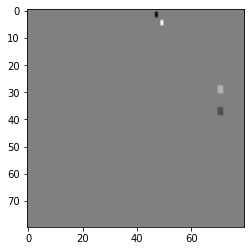

In [ ]:
plt.imshow(preprocessFrames(newObservation, observation), plt.cm.gray) # выведем результат предобработки наших кадров
# смещение здесь - это шаг от черного пикселя к светлому

In [ ]:
preprocessFrames(newObservation, observation) # выведем массив для этого состояния среды(кадра)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
preprocessFrames(newObservation, observation).shape # выведем форму массива

(80, 80)

 Cостоянием среды будет картинка 80*80, полученная вычитанием двух последовательных кадров, где по итогу все будет...
 ...заполнено нулями, а в местах смещения мяча либо ракетки - ненулевые значения.
 Далее keras'ом создадим policy, которая на основе состояния(картинки) выбирает действия.
 Output сети - вероятность того что нужно двигаться вверх

## Моделируем нейросеть


In [ ]:
# Простая модель с двумя слоями, на 200 нейронов в скрытом слое и сигмоидой на выходе
inputs = Input(shape=(80,80))      # на входном слое сетки изображение 80*80
flattenedLayer = Flatten()(inputs) # перевели в вектор
fullConnected = Dense(200, activation='relu', use_bias=False)(flattenedLayer)       # задали 200 нейронов и активацию релу
sigmoidOutput = Dense(1, activation='sigmoid', use_bias=False)(fullConnected)       # сигмоида на выходе
policyNetworkModel = Model(inputs=inputs, outputs=sigmoidOutput)                    # собрали модель стратегии(Model - абстрактный класс базовой модели)
policyNetworkModel.summary()       # посмотрим на модель

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 80, 80)]          0         
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 200)               1280000   
                                                                 
 dense_1 (Dense)             (None, 1)                 200       
                                                                 
Total params: 1,280,200
Trainable params: 1,280,200
Non-trainable params: 0
_________________________________________________________________


##Задаем функцию потерь в соответствии с вознаграждением


In [ ]:
# episode - одна тренировочная игра от начала партии до перезагрузки (розыгрыш эпизода до 21 очка; после победы или поражения вызываем reset)
episodeReward = Input(shape=(1,), name='episodeReward') # задаем награду за эпизод

In [ ]:
###########################
# Функция потерь в керасе имеет вид def loss(yTrue,yPred):...А так как нам нужно включить reward в loss, создаем...
# ...функцию rewardedLoss поверх неё, чтобы на входе добавить episodeReward
###########################
def rewardedLoss(episodeReward): # задаем новую функцию потерь, принимающую episodeReward, награда
  def loss(yTrue,yPred):
    # подаём в кач-ве yTrue фактически сделанное действие(action) 
    # если фактически сделанное действие было движением вверх - подаем 1 на yTrue, если нет то подаем 0
    # yPred - выход сетки(вероятность выбора движения вверх)
    # мы не подаём yPred в нейронку, его вычисляет керас
    
    # сначала log(0) and log(1) неопределены - загоняем yPred между значениями:
    tmpPred = Lambda(lambda x: keras.backend.clip(x,0.05,0.95))(yPred)
    # вычисляем логарифм вероятности. yPred - вероятность выбора движения вверх 
    # помним что yTrue = 1 когда фактически выбрано движение вверх, и 0 - когда вниз
    # формула похожа на кросс-энтропию в керасе, но здесь мы прописываем её вручную, чтобы умножить на значение награды
    tmpLoss = Lambda(lambda x:-yTrue*keras.backend.log(x)-(1-yTrue)*(keras.backend.log(1-x)))(tmpPred)
    # обновленная функция потерь - "функция политики"
    policyLoss = Multiply()([tmpLoss, episodeReward]) #добавляем в loss умножение на награду за эпизод
    return policyLoss # ввели обновленную функцию политики
  return loss         # возвращаем обновленную функцию политики

In [ ]:
###########################
# Создаем керас-оптимизатор и нейронку для обучения
###########################
episodeReward = Input(shape=(1,), name='episodeReward')                             # задаем награду за эпизод
policyNetworkTrain = Model(inputs=[inputs, episodeReward],outputs=sigmoidOutput)    # задаем сеть с добавлением на вход награды
 
myOptimizer = RMSprop(lr=0.0001)                                                    # выбрали оптимизатор с заданной скоростью обучения
policyNetworkTrain.compile(optimizer=myOptimizer, loss=rewardedLoss(episodeReward)) # задаем сеть с новой функцией потерь policy

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


## Генерация игрового эпизода с участием нейросети



In [ ]:
###########################
# Создадим функцию, которая будет генерировать игровой эпизод с участием нейросети
###########################
#игра начнется с того, что в новом эпизоде наш агент сделает движение("actualAction") вверх с вероятностью(upProbability), которую предсказала наша...
#...сетка policyNetwork, принявшая на вход состояние среды reshapedInput с подбитой под сеть формой. 
#reshapedInput же получили из состояния processedNetworkInput, которое представляет собой разницу в кадрах между новым и предыдущим...
#...кадром, полученную функцией preprocessFrames.
 
 
def generateEpisode(policyNetwork): # подаем на вход функции модель нейросети
  statesList = []                   # список состояний в течение эпизода, размер = (x,80,80)
  upDownActionList=[]               # список движений в течение эпизода: вверх - 1, вниз - 0
  rewardsList=[]                    # список наград за каждое действие
  networkOutputList=[]              # на выходе нейросети - вероятность что нужно идти вверх; собираем список из вероятности на каждом шаге
  env=gym.make("Pong-v0")           # cоздали среду
  observation = env.reset()         # перезагрузили состояние среды
  newObservation = observation      # получили новое состояние, которое наблюдает агент
  done = False                      # игровой эпизод активен(не завершён)
 
  while done == False: # пока игровой эпизод не завершён
    # На вход сети будет подаваться очередное состояние - разница между кадрами. 
    processedNetworkInput = preprocessFrames(newFrame=newObservation, lastFrame=observation) # зададим это состояние
    statesList.append(processedNetworkInput) # добавим в список состояний (впоследствие станет 'x'ом для входа в нейронку)
    reshapedInput = np.expand_dims(processedNetworkInput, axis=0) # размер 'x' - (80,80), делаем размерность (x,(1,80,80))
 
    upProbability = policyNetwork.predict(reshapedInput, batch_size=1)[0][0] # задаем вероятность шага вверх
    
    networkOutputList.append(upProbability) # добавляем к списку из вероятности идти вверх на каждом шаге
    actualAction = np.random.choice(a=[2,3], size=1, p=[upProbability, 1-upProbability])
    # сделаем фактический шаг либо вверх(2) c вероятностью upProbability, либо вниз(3) с обратной вероятностью
 
    if actualAction == 2:        # если пошли вверх
      upDownActionList.append(1.0) # добавляем единицу в список движений в течение эпизода
    else:                        # если не пошли вверх
      upDownActionList.append(0.0) # то добавляем ноль
 
    observation = newObservation # текущий newObservation записываем как старый перед тем, как сделать следующий шаг
    newObservation, reward, done, info = env.step(actualAction) # сделали новый шаг, получили новую награду, новое состояние
 
    rewardsList.append(reward)   # добавили текущую награду в список
 
    if done: # если игровой эпизод закончен
      break  # завершаем цикл
 
  env.close() # закрываем текущую среду
  return statesList, upDownActionList, rewardsList, networkOutputList
  # функция возвращает: список состояний в течение эпизода,список движений в течение эпизода, список наград за каждое действие,
  # и список вероятностей того, что нужно идти вверх

In [ ]:
###########################
# Сгенерируем эпизод игры с необученной сетью
###########################
statesList, upDownActionList, rewardsList, networkOutputList = generateEpisode(policyNetworkModel)
print("----------------------")
print("Количество состояний в эпизоде = "+str(len(statesList))) # количество состояний (кадров) в эпизоде
print("Форма состояния "+str(statesList[0].shape))              # форма каждого состояния
print("Количество наград за эпизод = "+str(len(rewardsList)))   # количество наград за эпизод(включая нулевые награды)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


----------------------
Количество состояний в эпизоде = 1848
Форма состояния (80, 80)
Количество наград за эпизод = 1848


In [ ]:
# Взглянем на фрагмент списка из вероятности идти вверх на каждом шаге.
print(networkOutputList[50:70])
# увидим что на каждом шаге вероятность крутится около 50% - сеть пока не понимает куда лучше шагать

[0.48458466, 0.4838059, 0.4780642, 0.48257685, 0.49353114, 0.49686414, 0.50167674, 0.48204407, 0.5026867, 0.472638, 0.4728532, 0.4907588, 0.4670649, 0.48745146, 0.5028799, 0.49019706, 0.4752786, 0.49464586, 0.488271, 0.46895137]


In [ ]:
# Взглянем на фактические действия: 1 - вверх, 0 - вниз
upDownActionList[50:70]
# Соответственно шаги также были случайными

[1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0]

In [ ]:
# Выведем список наград(почти везде нули, кроме тех моментов когда выигрываем или проигрываем очко)
print(rewardsList[50:70])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
# Взглянем на то, сколько мы раз выиграли в течение эпизода:
print("Количество выигранных очков = "+str(len(list(filter(lambda r: r>0,rewardsList))))) #берем как длину списка, отфильтрованного по наградам,большим 0
print("Количество проигранных очков = "+str(len(list(filter(lambda r: r<0,rewardsList))))) #берем как длину списка, отфильтрованного по наградам,меньшим 0
print("Количество нулевых наград = "+str(len(list(filter(lambda r: r==0,rewardsList))))) #с фильтром по 0

Количество выигранных очков = 2
Количество проигранных очков = 21
Количество нулевых наград = 1825


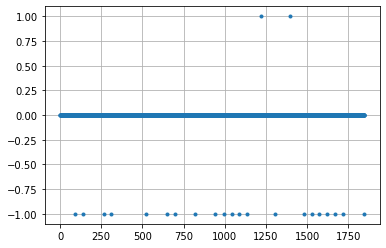

In [ ]:
# Выведем на графике полученные награды. Ненулевые награды за каждое очко будут отмечены точками.
plt.plot(rewardsList, '.') # точки будут наградами на графике
ax=plt.gca()               # получим текущие оси
ax.grid(True)              # с фоновой сеткой

## Эффективно определяем вознаграждение



In [ ]:
# Награды пока присуждаются только тем движениям, в момент после которых было пропущено или забито очко. Но так мы научимся нескоро,
# нам нужно указать на важность действия чуть ранее, когда мы отбивали мяч ракеткой. Чтобы сетка поняла что отбивать мяч - это хорошо,
# распределим награду на все шаги, предшествующие забитому/пропущеному мячу, причем чем давнее был шаг, тем меньший коэффициент награды он получит.
 
###########################
# Сформулируем функцию, которая распределит ненулевую награду для всех шагов в удачном/неудачном розыгрыше
###########################
def processRewards(rewardList): # подадим в функцию список наград
  rewardDecay = 0.99            # установим высший коэффициент награды для ближнего действия к победному/проигрышному действию
  tmpReward = 0                 # создадим временную переменную для награды
  rewardDecayed = np.zeros_like(rewardList,dtype=np.float32) # создадим массив из нулей для нового формата наград
  for i in range(len(rewardList)-1, -1, -1): # будем идти в обратную сторону от награды с шагом "-1"
    if rewardList[i] == 0:                 # если награда нулевая 
      tmpReward = tmpReward*rewardDecay    # зададим ей коэффициент
      rewardDecayed[i] = tmpReward         # и добавим в массив
    else:                                  # иначе
      tmpReward = rewardList[i]            # оставим награду неизменной
      rewardDecayed[i] = tmpReward         # и введём в том же виде в массив
  # запустим нормализацию значений наград, что позволит сетке лучше понимать, где были хорошие и плохие шаги
  rewardDecayed -= np.mean(rewardDecayed)  # вычтем среднее
  rewardDecayed /= np.std(rewardDecayed)   # разделим на стандартное отклонение
  return rewardDecayed
  # функция возвращает обновленный формат наград

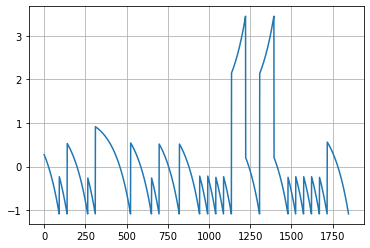

In [ ]:
# Посмотрим на распределение наград по новой функции
plt.plot(processRewards(rewardsList),'-') # добавляем в график награды с учетом новой функции
ax = plt.gca() # получим текущие оси
ax.grid(True)  # с фоновой сеткой
# новое распределение наград даст лучшее отражение эффективности действий

## Пример игрового эпизода с последующей тренировкой сети




In [ ]:
# Сгенерируем новый игровой эпизод:
statesList,upDownActionList,rewardsList,networkOutputList = generateEpisode(policyNetworkModel)
# сыграли до 21 очка, проиграли, получили списки всех состояний среды(кадров), шагов агента, вознаграждений и предсказаний
 
print("Количество состояний среды = "+str(len(statesList))) # выведем количество состояний среды(кадров) в игровом эпизоде
print("Форма состояний среды = "+str(statesList[0].shape))  # выведем форму для каждого состояния
print("Список наград  = "+str(len(rewardsList)))            # выведем список наград в игровом эпизоде(включая нулевые)

Количество состояний среды = 1094
Форма состояний среды = (80, 80)
Список наград  = 1094


In [ ]:
# Подготовим данные для тренировки    
x = np.array(statesList)          # зададим 'x' как массив состояний 
episodeReward = np.expand_dims(processRewards(rewardsList), 1) # подобьем размер для входа в сетку
yTmp = np.array(upDownActionList) # зададим 'y' как список движений вверх(1)/вниз(0)
yTrue = np.expand_dims(yTmp, 1)   # скорректируем форму под сетку
 
 
print("Форма наград за эпизод =", episodeReward.shape) # выведем форму наград за эпизод
print("Форма состояний среды =", x.shape)              # выведем форму состояний среды ('x' для нейросети)
print("Форма фактических движений =", yTrue.shape)     # выведем форму фактических движений ('y' для нейросети)

Форма наград за эпизод = (1094, 1)
Форма состояний среды = (1094, 80, 80)
Форма фактических движений = (1094, 1)


In [ ]:
episodeReward[:20]

array([[2.2690573],
       [2.2404182],
       [2.2114897],
       [2.182269 ],
       [2.1527534],
       [2.1229393],
       [2.0928242],
       [2.0624049],
       [2.0316782],
       [2.0006413],
       [1.969291 ],
       [1.9376237],
       [1.9056368],
       [1.8733267],
       [1.8406901],
       [1.8077241],
       [1.7744249],
       [1.7407894],
       [1.7068143],
       [1.6724958]], dtype=float32)

In [ ]:
# "Скормим" модели новые 'x' и 'y'
policyNetworkTrain.fit(x=[x, episodeReward], y=yTrue)

Train on 1094 samples
1094/1094 [==============================] - 0s 267us/sample - loss: -2.5428e-04


In [ ]:
###########################
# Теперь создадим серию игровых эпизодов
# Затем предобработаем данные и скормим нейросети
###########################
def generateEpisodeBatchesTraining(model, nBatches=10): # подаем на вход заданное количество игровых серий
  env = gym.make('Pong-v0')                             # создаем игровую среду Pong
  batchStateList = []                                   # зададим серию списков состояний
  batchUpDownActionList = []                            # зададим серию списков движений
  batchRewardsList = []                                 # зададим серию списков наград
  batchNetworkOutputList = []                           # зададим серию списков из вероятности идти вверх
  for i in range(nBatches):                             # для каждой серии 
    statesList, upDownActionList, rewardsList, networkOutputList = generateEpisode(model) # сгенерируем игровой эпизод
    batchStateList.extend(statesList)                   # добавим список состояний в серию списков состояний
    batchNetworkOutputList.extend(networkOutputList)    # добавим список вероятностей в серию списков из вероятности идти вверх
    batchUpDownActionList.extend(upDownActionList)      # добавим список движений в серию списков движений
    batchRewardsList.extend(rewardsList)                # добавим список наград в серию списков наград
 
  episodeReward = np.expand_dims(processRewards(batchRewardsList), 1) # зададим награды и изменим форму массива с добавлением оси
  x = np.array(batchStateList)                          # сформируем массив из серии списков состояний в качестве 'x' для нейросети
  yTmp = np.array(batchUpDownActionList)                # зададим 'y' как серию из списков движений вверх(1)/вниз(0)
  yTrue = np.expand_dims(yTmp, 1)                       # подгоним форму 'y' массива с добавлением оси
  
  history = policyNetworkTrain.fit(x=[x,episodeReward], y=yTrue, epochs=5, verbose=0) # скормим нейросети серию 'x'ов и 'y'ов
  
  batchLoss = history.history['loss'][-1]
  return batchStateList, batchUpDownActionList, batchRewardsList, batchNetworkOutputList, batchLoss
  # функция вернёт серию списков состояний, серию списков движений, серию списков наград, серию списков из вероятности идти вверх

## Обучаем сеть на серии игровых эпизодов



In [ ]:
trainingTimes = 10                     # установим количество тренировок  
def trainingResearch(trainingTimes):  
  startTime = time.time()
  for training in range(trainingTimes): # для каждой тренировки
    
    # сделаем по 10 игровых эпизодов(1 эпоха - 10 игр)
    statesList,upDownActionList,rewardsList,networkOutputList, batchLoss = generateEpisodeBatchesTraining(policyNetworkModel, 10) 
    
    # print("Тренировка = " + str((training)+1))                           # выведем на экран номер очередной тренировки
    # print("Время тренировки = " + str(round(endTime - startTime))+"сек") # время тренировки
    # print("Ошибка на тренировке = " + str(round(batchLoss, 5)))          # выведем на экран ошибку на тренировке
    rr=np.array(rewardsList)                                             # сформируем все награды
    # print("Выиграли очков = "+ str(len(rr[rr>0])) + " Проиграли очков = " + str(len(rr[rr<0]))) # выведем на экран сумму выигранных и проигранных очков
    # print("")
    if training % 10 == 0:                                               # через каждые 10 эпизодов
      policyNetworkModel.save("policyNetworkModel.h5")                   # сохраним модель в памяти
      policyNetworkModel.save("policyNetworkModel" + str(training)+".h5")# и для удобства сохраним модель в памяти с количеством тренировок в названии
      # with open('rewardsModelSimple.txt','a') as recordingRewards:       # также в текстовом файле будем вести записи с динамикой выигранных очков
      #   recordingRewards.write("training = " + str(training) + 'выигранных очков = ' + str(len(rr[rr > 0])))
      #   recordingRewards.write("\n")
  endTime = time.time()
  print("Время тренировки = " + str(round(endTime - startTime))+"сек")
  print("Выиграли очков = "+ str(len(rr[rr>0])) + " Проиграли очков = " + str(len(rr[rr<0])))

In [ ]:

for i in range(1, 4):
  print("Тренировка = " + str((i)))
  trainingResearch(i*trainingTimes)
  

Тренировка = 1
Время тренировки = 814сек
Выиграли очков = 40 Проиграли очков = 210
Тренировка = 2
Время тренировки = 2166сек
Выиграли очков = 49 Проиграли очков = 210
Тренировка = 3
Время тренировки = 3344сек
Выиграли очков = 64 Проиграли очков = 210


# Разная архитектура нейросети

## Изменили количество связей в Dense слое

In [ ]:
# Простая модель с двумя слоями, на 1024 нейрона в скрытом слое и сигмоидой на выходе
inputs = Input(shape=(80,80))      # на входном слое сетки изображение 80*80
flattenedLayer = Flatten()(inputs) # перевели в вектор
fullConnected = Dense(1024, activation='relu', use_bias=False)(flattenedLayer)       # задали 200 нейронов и активацию релу
sigmoidOutput = Dense(1, activation='sigmoid', use_bias=False)(fullConnected)       # сигмоида на выходе
policyNetworkModel1024 = Model(inputs=inputs, outputs=sigmoidOutput)                    # собрали модель стратегии(Model - абстрактный класс базовой модели)
policyNetworkModel1024.summary()       # посмотрим на модель

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 80, 80)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 6400)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              6553600   
                                                                 
 dense_3 (Dense)             (None, 1)                 1024      
                                                                 
Total params: 6,554,624
Trainable params: 6,554,624
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Обучим нашего агента на 10 тренировках
policyNetworkModel = policyNetworkModel1024 # сохраняем новую модель в policyNetworkModel (она прописана во всех функциях)
trainingResearch(10)                        # запускаем обучение

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Время тренировки = 499сек
Выиграли очков = 2 Проиграли очков = 210


## Добавили Dense слой

In [ ]:
# Простая модель с добавлением Dense слоя, на 200 нейрона в скрытом слое и сигмоидой на выходе
inputs = Input(shape=(80,80))      # на входном слое сетки изображение 80*80
flattenedLayer = Flatten()(inputs) # перевели в вектор
fullConnected = Dense(200, activation='relu', use_bias=False)(flattenedLayer)       # задали 200 нейронов и активацию релу
fullConnected = Dense(200, activation='relu', use_bias=False)(fullConnected)        # добавляем еще один Dense слой на 200 нейронов 
sigmoidOutput = Dense(1, activation='sigmoid', use_bias=False)(fullConnected)       # сигмоида на выходе
policyNetworkModel2x200 = Model(inputs=inputs, outputs=sigmoidOutput)                    # собрали модель стратегии(Model - абстрактный класс базовой модели)
policyNetworkModel2x200.summary()       # посмотрим на модель

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 80, 80)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 6400)              0         
                                                                 
 dense_4 (Dense)             (None, 200)               1280000   
                                                                 
 dense_5 (Dense)             (None, 200)               40000     
                                                                 
 dense_6 (Dense)             (None, 1)                 200       
                                                                 
Total params: 1,320,200
Trainable params: 1,320,200
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Обучим нашего агента на 10 тренировках
policyNetworkModel = policyNetworkModel2x200 # сохраняем новую модель в policyNetworkModel (она прописана во всех функциях)
trainingResearch(10)                        # запускаем обучение

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Время тренировки = 489сек
Выиграли очков = 6 Проиграли очков = 210


## Добавили Сonv1D слой

In [ ]:
# Простая модель с добавлением Dense слоя, на 200 нейрона в скрытом слое и сигмоидой на выходе
inputs = Input(shape=(80, 80))      # на входном слое сетки изображение 80*80*3
convolution = Conv1D(64, (2), padding='same', activation='relu')(inputs)    # добавляем слой Сonv1D
flattenedLayer = Flatten()(convolution) # перевели в вектор
fullConnected = Dense(200, activation='relu', use_bias=False)(flattenedLayer)  # задали 200 нейронов и активацию релу
sigmoidOutput = Dense(1, activation='sigmoid', use_bias=False)(fullConnected)       # сигмоида на выходе
policyNetworkModelConv = Model(inputs=inputs, outputs=sigmoidOutput)                    # собрали модель стратегии(Model - абстрактный класс базовой модели)
policyNetworkModelConv.summary() 

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 80, 80)]          0         
                                                                 
 conv1d_6 (Conv1D)           (None, 80, 64)            10304     
                                                                 
 flatten_18 (Flatten)        (None, 5120)              0         
                                                                 
 dense_28 (Dense)            (None, 200)               1024000   
                                                                 
 dense_29 (Dense)            (None, 1)                 200       
                                                                 
Total params: 1,034,504
Trainable params: 1,034,504
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Обучим нашего агента на 10 тренировках
policyNetworkModel = policyNetworkModelConv # сохраняем новую модель в policyNetworkModel (она прописана во всех функциях)
trainingResearch(10)                        # запускаем обучение

Время тренировки = 488сек
Выиграли очков = 10 Проиграли очков = 210


Вывод: добавление сверточного слоя привело к улучшению результата в 2 раза. Хуже всего сработали изменения гиперпараметров. Средний результат у варианта с добавлением Dense слоя. Как резюме, где работа ведется с картинками , надо пробовать применять сверточные слои.
  Увеличение количества тренировок улучшает результат , но не пропорционально количеству тренировок, т.е. одна тренировка дает 40 успешных баллов, а две - всего 49 выигранных баллов.